<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 6: Practical - Beyond Linearity <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani - Arman Malekzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Erfan Sadraiye
### Student Number : 99101835
### Colab Link: https://colab.research.google.com/drive/1CzgMmIqt3fWOotfnHxDQax5NNbGq8nG_?usp=sharing
___

# Intro

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town<br>
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
- INDUS - proportion of non-retail business acres per town.<br>
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
- NOX - nitric oxides concentration (parts per 10 million)<br>
- RM - average number of rooms per dwelling<br>
- AGE - proportion of owner-occupied units built prior to 1940<br>
- DIS - weighted distances to five Boston employment centres<br>
- RAD - index of accessibility to radial highways<br>
- TAX - full-value property-tax rate per `$`10,000<br>
- PTRATIO - pupil-teacher ratio by town<br>
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
- LSTAT - % lower status of the population<br>
- MEDV - Median value of owner-occupied homes in $1000's<br>

# Libraries

In [1]:
# You can use thes following packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import itertools

# Sec 1: Data Exploration and Preprocessing (30)

Download the dataset

In [2]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2023-05-26 00:59:19--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.1’

BostonHousing.csv.1 100%[===================>]  34.90K  --.-KB/s    in 0.004s  

2023-05-26 00:59:19 (9.37 MB/s) - ‘BostonHousing.csv.1’ saved [35735/35735]



Load the dataset as a dataframe **(S1-1: 2 points)**

In [3]:
df = pd.read_csv('BostonHousing.csv')
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


For each of the features, check the number of unique values **(S1-2: 2 points)**

In [4]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

Check if there are any null values in the dataframe (and remove them if they exist) **(S1-3: 2 points)**

In [5]:
df.dropna(inplace=True)

We want to predict prices. Therefore, we'll have `medv` as our target. Make a list of the features other than the target. **(S1-4: 2 points)**

In [6]:
all_features = df.columns.tolist()
all_features.remove('medv')
all_features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

Plot a boxplot for each of the features **(S1-5: 2 points)**

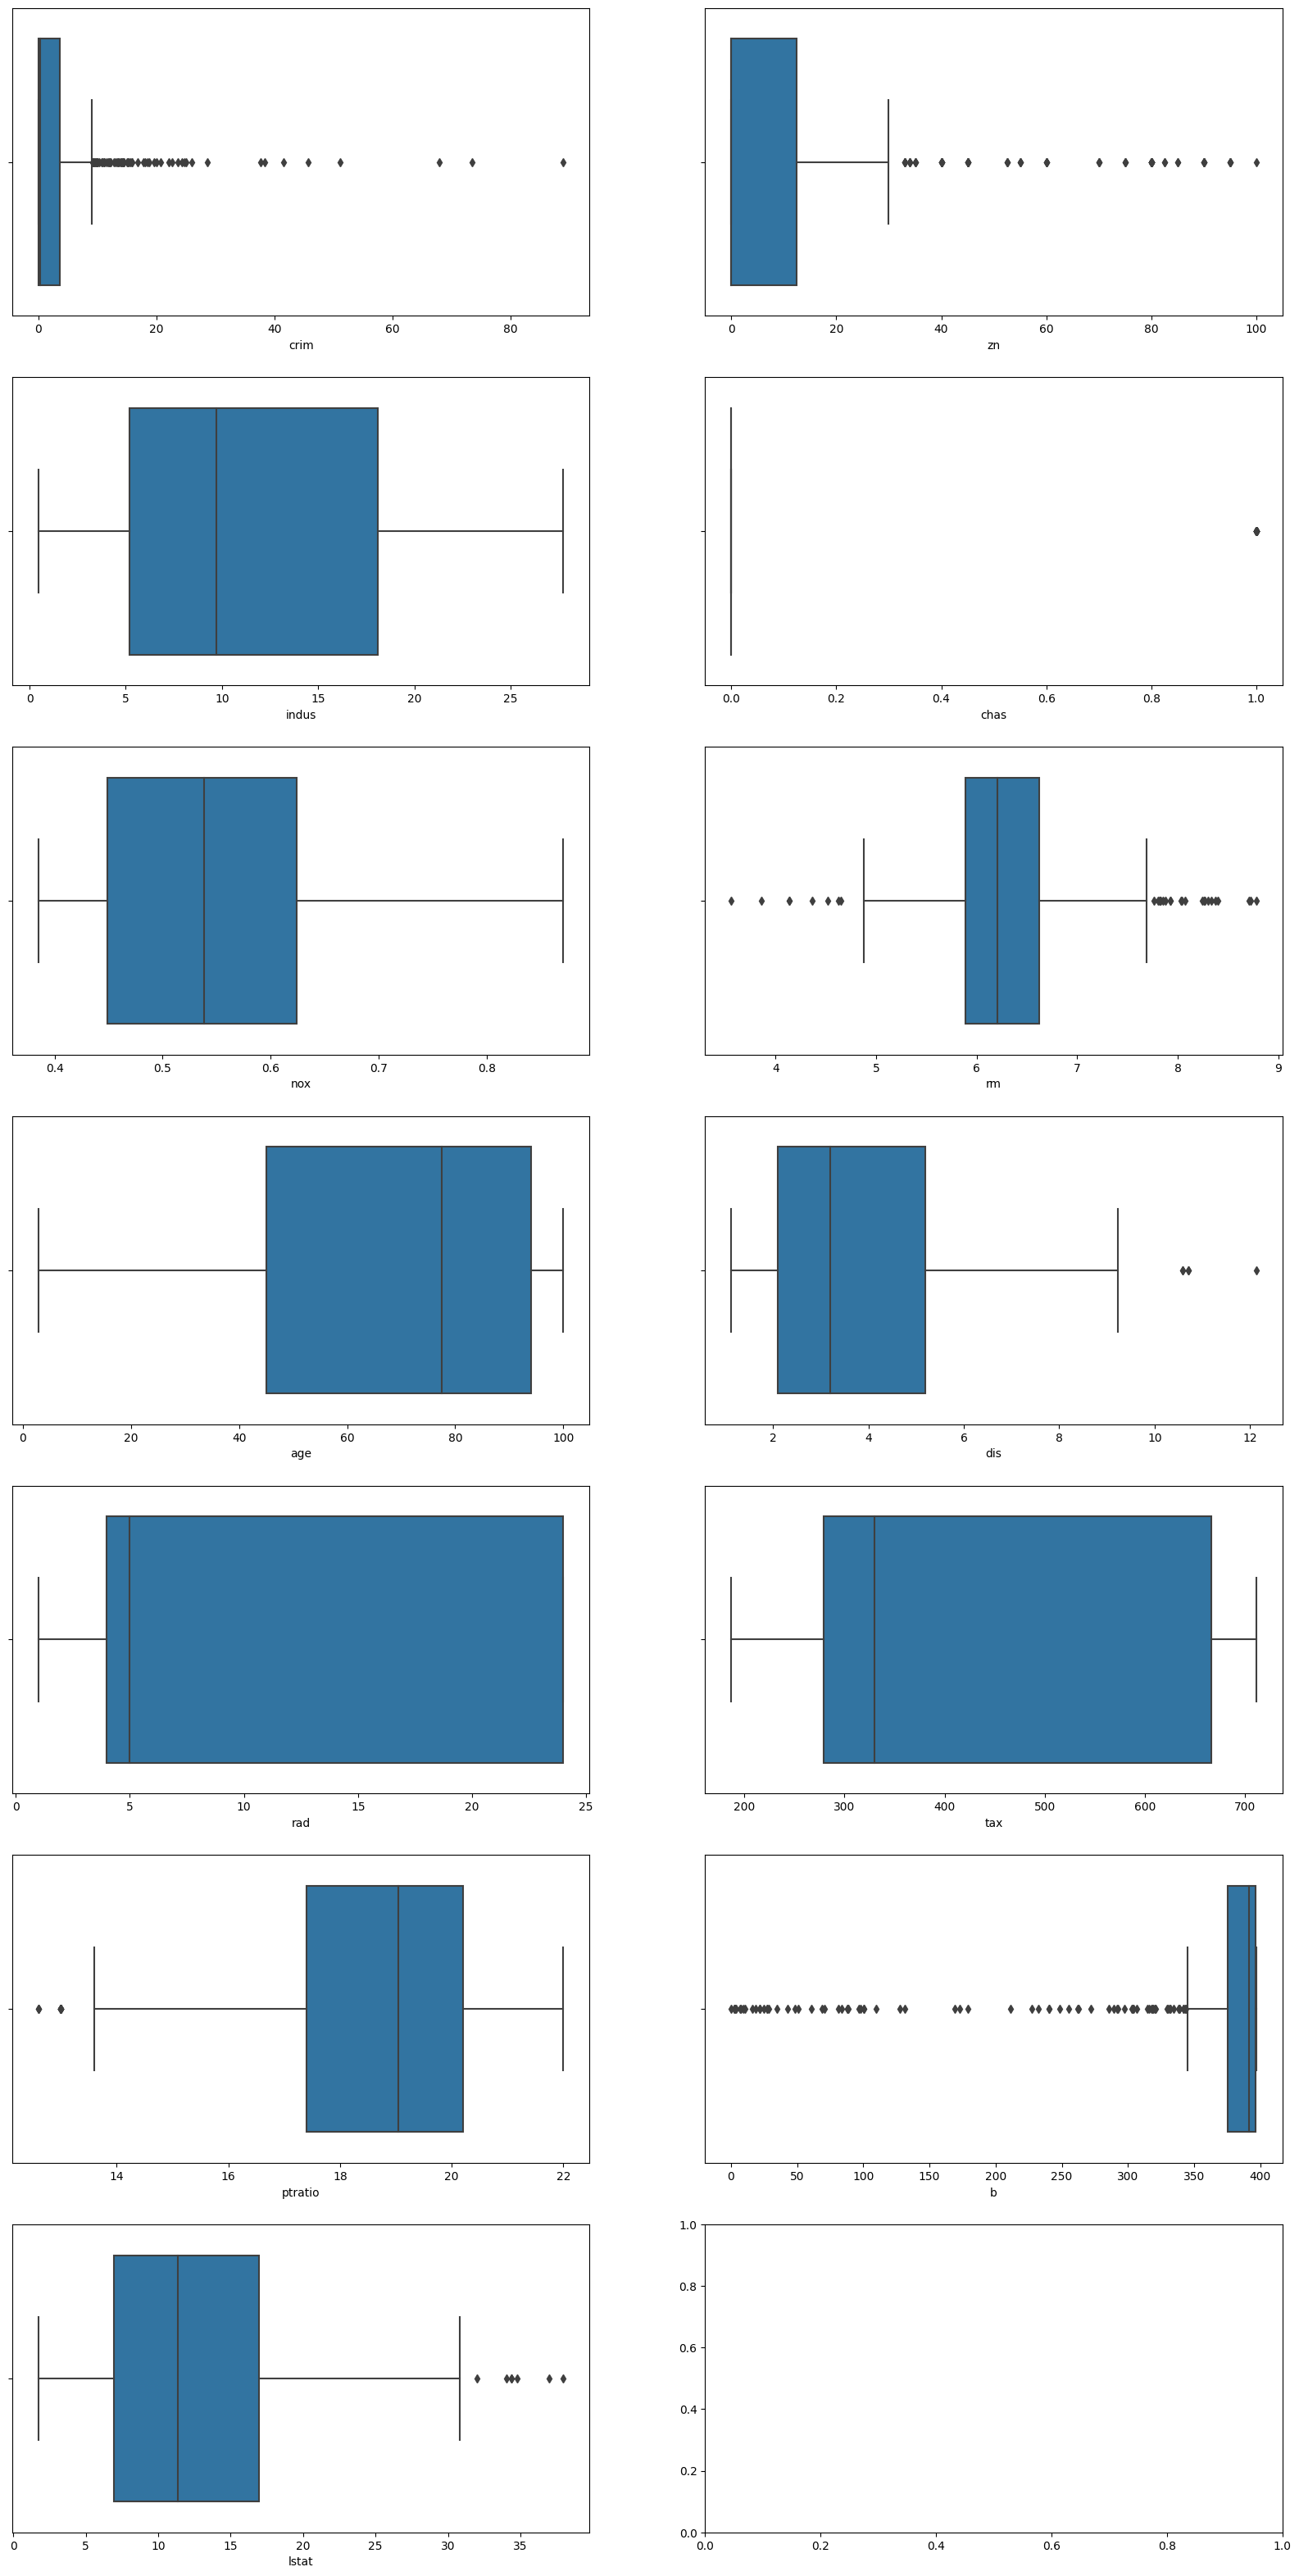

<Axes: >

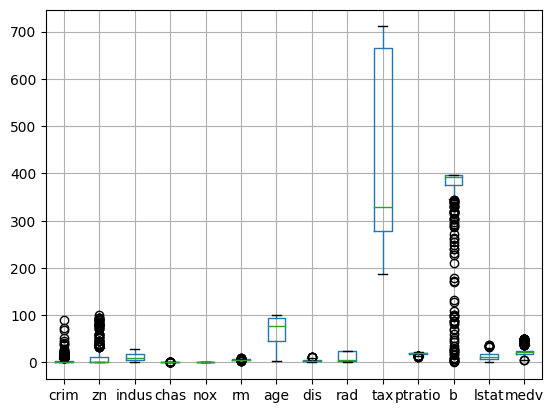

In [7]:
fig, axes = plt.subplots(7, 2, figsize=(20, 40))
for i, feature in enumerate(all_features):
    sns.boxplot(ax=axes[i // 2, i % 2], data=df, x=feature)
plt.show()
df.boxplot()

Plot the historgram of the target **(S1-6: 5 points)**

<Axes: >

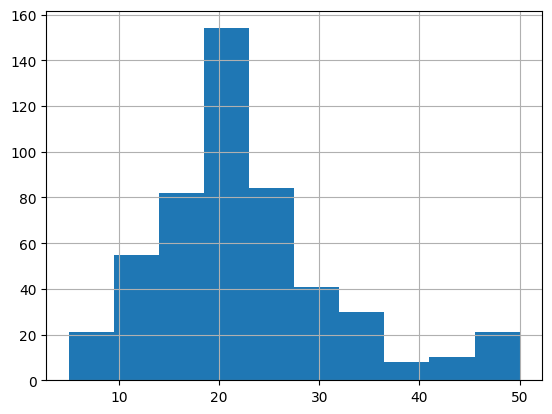

In [8]:
df['medv'].hist()

Have a look at the pair-plot of the dataframe's columns **(S1-7: 5 points)**

In [9]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Check the correlation between all pairs of features. Draw a heatmap containing these values. **(S1-8: 5 points)**

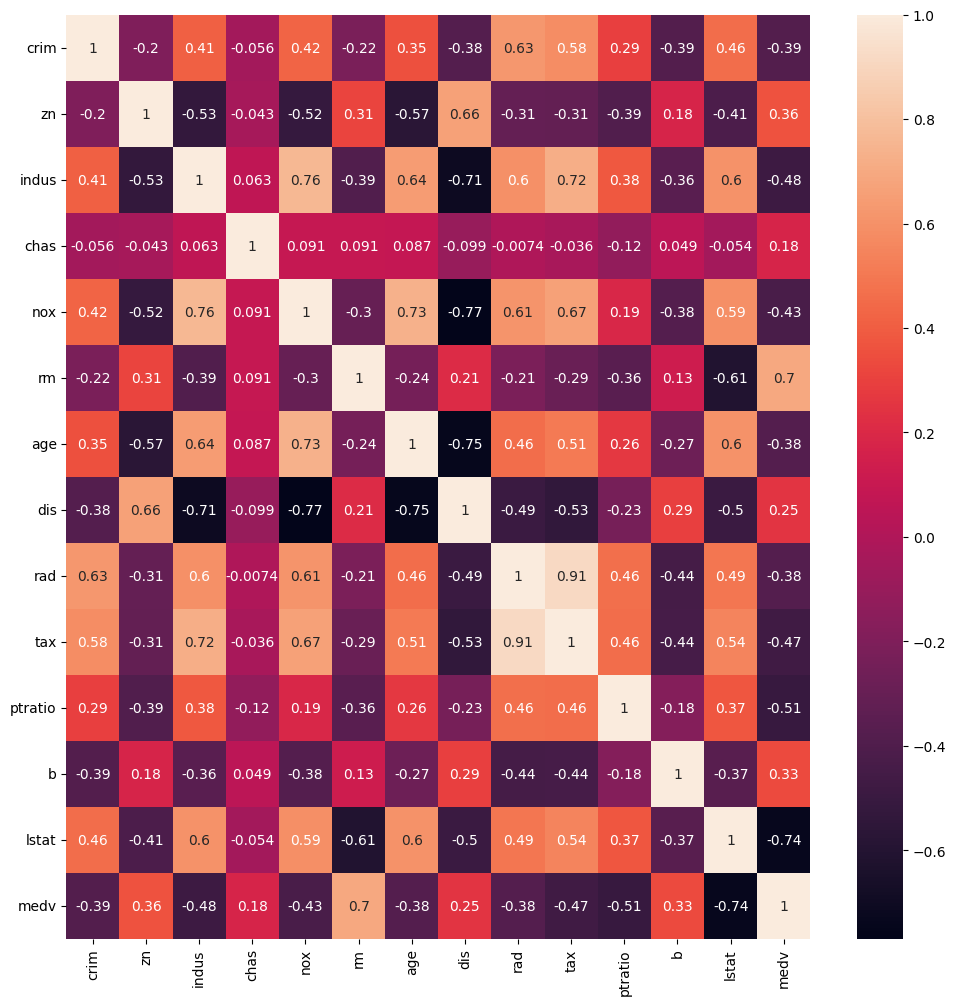

In [10]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

Based on the correlation matrix, reduce the number of features to 10. **(S1-9: 5 points)**

In [11]:
x_df = df.drop('medv', axis=1)
correlation_matrix = x_df.corr().abs()
while len(x_df.columns) > 10:
    correlation_matrix = x_df.corr().abs()
    for feature in correlation_matrix.columns:
        correlation_matrix[feature][feature] = pd.NA
    most_correlated_pair = correlation_matrix.max().idxmax()
    print(f'{most_correlated_pair} deleted!')
    x_df.drop(most_correlated_pair, axis=1, inplace=True)

features = x_df.columns.tolist()
print('Remaining features:')
print(features)


rad deleted!
nox deleted!
age deleted!
Remaining features:
['crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'tax', 'ptratio', 'b', 'lstat']


# Sec 2: Data Manipulation and Feature Extraction (10)

Split the dataframe into training and evaluation sets (called `(x_train, y_train)` and `(x_eval, y_eval)`) **(S2-1: 2 points)**

In [21]:
x = df[features].to_numpy()
y = df['medv'].to_numpy()
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=1)

Manipulate the training data to make it have unit variance and zero mean **(S2-2: 5 points)**

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Normalize the evaluation set accordingly **(S2-3: 3 points)**

In [23]:
x_eval = scaler.transform(x_eval)


# Sec 3: Fitting Models

In this part, we are going to use "pipelines" which are built inside `sklearn`. You are advised to familiarize yourself with them using the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## A: Polynomial Regression (30)

Create 3 pipelines for polynomial regression of different arbitrary degrees. **(S3-1: 5 points)**

In [24]:
degrees = [x for x in range(1, 4)]
models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for degree in degrees]

Calculate both the training and evaluation MSE error for each of the models. Finally, store these values in two lists, one containing the error values for the training set and the other one holding the same values for the evaluation set. **(S3-2: 10 points)**

In [25]:
train_errors = []
eval_errors = []
for poly in models:
    poly.fit(x_train, y_train)
    train_errors.append(mean_squared_error(y_train, poly.predict(x_train)))
    eval_errors.append(mean_squared_error(y_eval, poly.predict(x_eval)))
print('Training MSE:')
print(train_errors)
print('Evaluation MSE:')
print(eval_errors)

Training MSE:
[23.721383023716765, 8.974302357210972, 33.35280787326322]
Evaluation MSE:
[24.65300275059121, 9.904347090253642, 106.47077968223424]


Plot the degree of the polynomials versus the corresponding MSE errors **(S3-3: 10 points)**

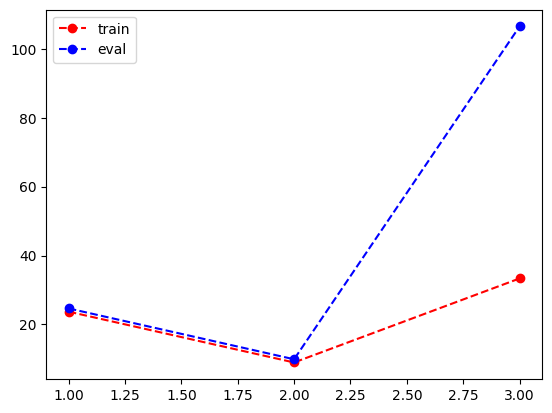

In [26]:
plt.plot(degrees, train_errors, label='train', color='red', linestyle='dashed', marker='o')
plt.plot(degrees, eval_errors, label='eval', color='blue', linestyle='dashed', marker='o')
plt.legend()
plt.show()

What is your conclusion? **(S3-4: 5 points)**

Answer:
 
If we increase the degree of the polynomial model, it will have more flexibility and better training MSE. But evaluation MSE acts differently. It will decrease at first and increase greatly after the 2-degree polynomial model. We can conclude the main relation between features, is close to a 2-degree polynomial probably and we overfit on training data if we use a three or more-degree polynomial model

## B: Splines (30)

Create pipelines for spline regression based on all combinations of values for degree and the number of knots **(S3-5: 5 points)**

In [27]:
degrees = [x for x in range(1, 7)]
knots = [x for x in range(2, 10)]
splines = []
for degree, knot in itertools.product(degrees, knots):
    splines.append(make_pipeline(SplineTransformer(degree=degree, n_knots=knot), LinearRegression()))

Calculate both the training and evaluation MSE error for each of models and store them in the corresponding pipelines. **(S3-6: 10 points)**

Note: A pipeline is a `dict` object. So, to store something in it, you have to consider a "key" and a "value".

In [28]:
for spline in splines:
    print(spline.fit(x_train, y_train))
train_errors = []
eval_errors = []
for spline in splines:
    train_error = mean_squared_error(y_train, spline.predict(x_train))
    eval_error = mean_squared_error(y_eval, spline.predict(x_eval))
    spline.train_error = train_error
    spline.eval_error = eval_error

Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=2)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=3)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=4)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=6)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=7)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineTransformer(degree=1, n_knots=8)),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('splinetransformer', SplineT

Plot the joint distribution of training and eval error based on degree and knots **(S3-7: 10 points)**

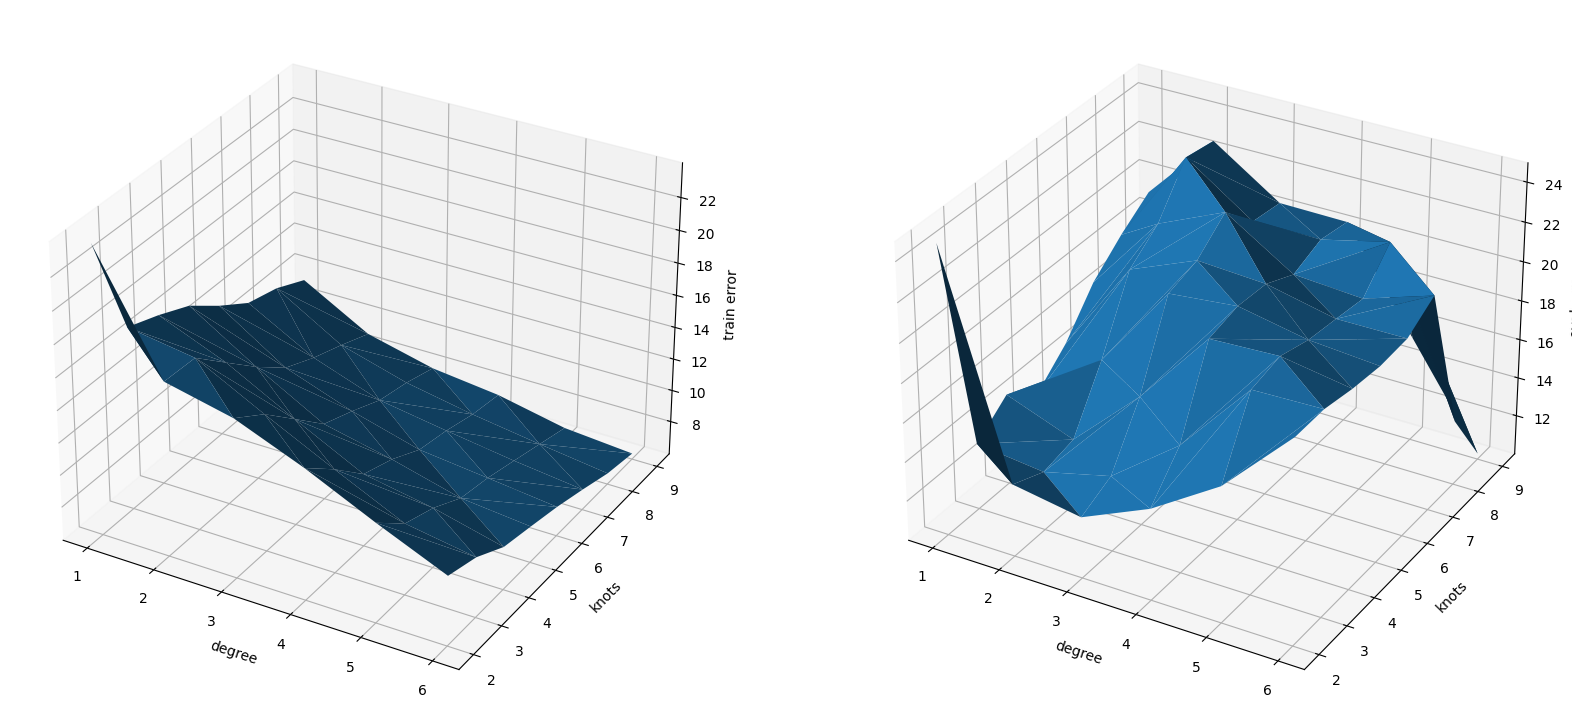

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf([spline['splinetransformer'].degree for spline in splines], [spline['splinetransformer'].n_knots for spline in splines], [spline.train_error for spline in splines])
ax.set_xlabel('degree')
ax.set_ylabel('knots')
ax.set_zlabel('train error')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf([spline['splinetransformer'].degree for spline in splines], [spline['splinetransformer'].n_knots for spline in splines], [spline.eval_error for spline in splines])
ax.set_xlabel('degree')
ax.set_ylabel('knots')
ax.set_zlabel('eval error')

plt.show()




What is your conclusion? **(S3-8: 5 points)**

When we increase the value of the degree or knot, we increase the degree of freedom and flexibility of the model. So the training MSE will decrease when we have a more flexible model or high value of knot or degree. But in evaluation data, at first, when we have 1 degree polynomial and 2 knots, it has a high MSE and it means the model cannot learn true relations in training data. With increasing the degree and knots, the model learns better and MSE will decrease. For example, we have good MSE with knots =3 and degree =2. After that the MSE increase again and the model is overfitted to training data.
